<a href="https://colab.research.google.com/github/jorregoc/Covid_Project/blob/main/Covid_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Covid Project

This project answers two questions: what has been the behavior of coronavirus cases and what are the variables that influence coronavirus deaths by continent. For that, coronavirus cases and deaths by continent with the complete Our World in Data COVID-19 dataset is explored. The results are presented in a Power BI and Google Data Studio dashboard.

Update dataset link: https://github.com/owid/covid-19-data/tree/master/public/data

Description and source for each variable in the dataset: https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv

Author: Julian Orrego Castañeda

Date: 4/6/2021

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [4]:
covid_data = pd.read_csv('covid-data.csv')
pd.options.display.float_format = '{:.1f}'.format
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,nan,nan,nan,nan,0.0,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,8.3,38928341.0,54.4,18.6,2.6,1.3,1804.0,nan,597.0,9.6,nan,nan,37.7,0.5,64.8,0.5
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,nan,nan,nan,nan,0.0,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,8.3,38928341.0,54.4,18.6,2.6,1.3,1804.0,nan,597.0,9.6,nan,nan,37.7,0.5,64.8,0.5
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,nan,nan,nan,nan,0.0,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,8.3,38928341.0,54.4,18.6,2.6,1.3,1804.0,nan,597.0,9.6,nan,nan,37.7,0.5,64.8,0.5
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,nan,nan,nan,nan,0.0,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,8.3,38928341.0,54.4,18.6,2.6,1.3,1804.0,nan,597.0,9.6,nan,nan,37.7,0.5,64.8,0.5
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,nan,nan,nan,nan,0.0,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,8.3,38928341.0,54.4,18.6,2.6,1.3,1804.0,nan,597.0,9.6,nan,nan,37.7,0.5,64.8,0.5


In [5]:
covid_data.shape

(93326, 59)

In [6]:
covid_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [7]:
covid_data_copy = covid_data[['continent','location','date','population','total_cases','new_cases','total_deaths', 'new_deaths','total_cases_per_million',
       'new_cases_per_million','total_deaths_per_million','new_deaths_per_million','median_age', 'aged_65_older',
       'aged_70_older','cardiovasc_death_rate', 'diabetes_prevalence','handwashing_facilities', 'hospital_beds_per_thousand']]

covid_data_copy.head()

,continent,location,date,population,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand
0,Asia,Afghanistan,2020-02-24,38928341.0,1.0,1.0,nan,nan,0.0,0.0,nan,nan,18.6,2.6,1.3,597.0,9.6,37.7,0.5
1,Asia,Afghanistan,2020-02-25,38928341.0,1.0,0.0,nan,nan,0.0,0.0,nan,nan,18.6,2.6,1.3,597.0,9.6,37.7,0.5
2,Asia,Afghanistan,2020-02-26,38928341.0,1.0,0.0,nan,nan,0.0,0.0,nan,nan,18.6,2.6,1.3,597.0,9.6,37.7,0.5
3,Asia,Afghanistan,2020-02-27,38928341.0,1.0,0.0,nan,nan,0.0,0.0,nan,nan,18.6,2.6,1.3,597.0,9.6,37.7,0.5
4,Asia,Afghanistan,2020-02-28,38928341.0,1.0,0.0,nan,nan,0.0,0.0,nan,nan,18.6,2.6,1.3,597.0,9.6,37.7,0.5


###Covid Cases

In [8]:
covid_cases = covid_data_copy.copy(deep=True)
covid_cases = covid_cases[['location','date','total_cases_per_million']]
covid_cases

,location,date,total_cases_per_million
0,Afghanistan,2020-02-24,0.0
1,Afghanistan,2020-02-25,0.0
2,Afghanistan,2020-02-26,0.0
3,Afghanistan,2020-02-27,0.0
4,Afghanistan,2020-02-28,0.0
...,...,...,...
93321,Zimbabwe,2021-05-30,2620.2
93322,Zimbabwe,2021-05-31,2621.4
93323,Zimbabwe,2021-06-01,2623.8
93324,Zimbabwe,2021-06-02,2626.1


In [9]:
covid_cases.dtypes

location                    object
date                        object
total_cases_per_million    float64
dtype: object

In [10]:
covid_cases['date'] = pd.to_datetime(covid_cases['date'])

In [11]:
cases_by_time = covid_cases.pivot(index= 'date', columns= 'location', values= 'total_cases_per_million')
cases_by_time.tail()

location,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Asia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bonaire Sint Eustatius and Saba,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,...,South Africa,South America,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-05-31,1845.4,3610.7,45977.8,2939.8,177661.3,1051.3,nan,12866.6,83675.6,75144.3,nan,11049.0,1181.1,71595.2,32937.2,29996.3,141357.2,4860.9,13978.4,41742.6,91633.8,32214.1,664.7,nan,2099.5,31806.6,nan,62183.3,23376.6,77839.7,nan,553.2,60240.4,642.7,402.8,1800.0,2973.3,36811.0,54747.6,nan,...,28083.9,66828.2,2746.3,954.8,78674.1,8703.2,809.5,25491.2,105797.1,80273.9,1399.7,357.4,1395.3,8.5,2289.3,5304.7,1626.6,nan,17084.1,29231.3,62241.7,nan,nan,nan,1030.7,51696.9,57716.2,66335.2,100505.3,84780.1,2997.8,13.0,33374.5,8234.8,76.4,nan,21903.2,226.0,5181.9,2621.4
2021-06-01,1874.7,3618.1,45985.5,2946.7,177687.2,1057.4,nan,12866.6,84457.9,75180.7,nan,11093.8,1181.3,71632.6,32954.6,29996.3,142684.8,4871.6,13978.4,41809.9,91763.1,32239.2,664.7,nan,2115.1,32101.2,nan,62208.0,23376.6,78211.0,nan,557.7,60274.3,642.7,403.9,1836.8,2973.3,36854.8,54898.7,nan,...,28144.8,67196.0,2759.5,954.8,78767.9,8837.6,809.9,25787.8,105797.1,80361.3,1401.6,371.3,1395.3,8.5,2321.2,5431.4,1628.4,nan,17373.5,29359.3,62326.0,nan,nan,nan,1044.2,51748.7,57915.2,66380.9,100574.6,85788.5,3002.6,13.0,33374.5,8284.1,78.3,nan,21962.7,226.3,5212.2,2623.8
2021-06-02,1901.6,3624.1,45990.3,2956.4,177881.3,1063.7,nan,12887.0,85232.7,75211.7,nan,11139.2,1181.8,71677.0,32969.9,30169.3,143822.5,4883.7,13999.3,41906.7,91923.5,32274.5,666.7,nan,2124.1,32384.7,nan,62232.1,23376.6,78660.7,nan,557.7,60302.7,642.7,406.0,1881.7,2973.3,36912.6,55206.2,nan,...,28144.8,67627.9,2772.8,954.8,78874.5,8992.0,810.4,26299.2,105797.1,80444.1,1403.3,394.2,1395.3,8.5,2370.5,5544.4,1630.2,nan,17667.9,29522.1,62411.1,nan,nan,nan,1064.2,51802.1,58132.9,66443.7,100625.7,86801.3,3009.5,13.0,33374.5,8325.9,80.9,nan,22024.2,226.6,5252.6,2626.1
2021-06-03,1929.7,3631.0,45993.5,2964.0,177984.9,1069.2,nan,12887.0,85947.1,75248.2,nan,11184.9,1182.0,71708.3,32982.6,30337.1,144958.0,4893.9,14009.8,41999.7,92061.5,32292.1,666.7,nan,2143.6,32592.8,nan,62256.5,23905.6,79053.1,nan,557.7,60327.2,643.2,407.4,1925.3,2973.3,36970.2,55350.1,nan,...,28144.8,68007.6,2786.3,954.8,78986.8,9145.9,813.1,26721.9,106640.7,80512.0,1405.1,418.8,1395.3,8.5,2426.2,5629.4,1632.3,nan,18058.0,29655.5,62489.4,nan,nan,nan,1087.8,51864.0,58334.0,66520.0,100683.3,87632.4,3017.6,13.0,33374.5,8370.1,82.8,nan,22086.2,226.9,5297.4,2630.2
2021-06-04,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


It is observed that the dataset has several null values, which correspond to the days in which no cases were reported. Therefore, these fields are replaced with zeros. Additionally, for the 2021-06-04, the dataframe has no information and this row is removed too.


In [12]:
cases_by_time.fillna(value=0, inplace=True)
cases_by_time.isnull().sum()

location
Afghanistan          0
Africa               0
Albania              0
Algeria              0
Andorra              0
                    ..
Wallis and Futuna    0
World                0
Yemen                0
Zambia               0
Zimbabwe             0
Length: 229, dtype: int64

To delete the last row there are several options. The ipython magic function %timeit allows to calculate the time execution of each one and choose the one that offers the best performance.

In [13]:
%timeit cases_by_time.head(-1)

The slowest run took 6.25 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 68.3 µs per loop


In [14]:
 %timeit cases_by_time.drop(cases_by_time.tail(1).index)

1000 loops, best of 5: 937 µs per loop


In [15]:
cases_by_time = cases_by_time.head(-1)
cases_by_time.tail()

location,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Asia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bonaire Sint Eustatius and Saba,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,...,South Africa,South America,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-05-30,1817.7,3600.6,45975.7,2935.5,177221.3,1045.6,0.0,12856.4,83052.2,75132.8,0.0,11005.6,1180.6,71569.8,32928.1,29866.6,139961.4,4850.5,13978.4,41675.7,91564.7,32168.8,664.7,0.0,2089.1,31566.3,0.0,62130.6,22865.5,77696.5,0.0,550.9,60196.8,642.5,399.8,1758.7,2973.3,36732.3,54603.7,0.0,...,27973.5,66580.1,2737.3,954.8,78465.9,8567.2,804.8,25167.3,105797.1,80075.5,1398.1,342.6,1395.3,8.5,2240.3,5231.2,1625.5,0.0,16890.4,29164.8,62164.7,0.0,0.0,0.0,1019.3,51670.4,57537.9,66286.7,100487.8,83912.2,2991.5,13.0,33374.5,8186.8,73.0,0.0,21854.6,225.9,5170.3,2620.2
2021-05-31,1845.4,3610.7,45977.8,2939.8,177661.3,1051.3,0.0,12866.6,83675.6,75144.3,0.0,11049.0,1181.1,71595.2,32937.2,29996.3,141357.2,4860.9,13978.4,41742.6,91633.8,32214.1,664.7,0.0,2099.5,31806.6,0.0,62183.3,23376.6,77839.7,0.0,553.2,60240.4,642.7,402.8,1800.0,2973.3,36811.0,54747.6,0.0,...,28083.9,66828.2,2746.3,954.8,78674.1,8703.2,809.5,25491.2,105797.1,80273.9,1399.7,357.4,1395.3,8.5,2289.3,5304.7,1626.6,0.0,17084.1,29231.3,62241.7,0.0,0.0,0.0,1030.7,51696.9,57716.2,66335.2,100505.3,84780.1,2997.8,13.0,33374.5,8234.8,76.4,0.0,21903.2,226.0,5181.9,2621.4
2021-06-01,1874.7,3618.1,45985.5,2946.7,177687.2,1057.4,0.0,12866.6,84457.9,75180.7,0.0,11093.8,1181.3,71632.6,32954.6,29996.3,142684.8,4871.6,13978.4,41809.9,91763.1,32239.2,664.7,0.0,2115.1,32101.2,0.0,62208.0,23376.6,78211.0,0.0,557.7,60274.3,642.7,403.9,1836.8,2973.3,36854.8,54898.7,0.0,...,28144.8,67196.0,2759.5,954.8,78767.9,8837.6,809.9,25787.8,105797.1,80361.3,1401.6,371.3,1395.3,8.5,2321.2,5431.4,1628.4,0.0,17373.5,29359.3,62326.0,0.0,0.0,0.0,1044.2,51748.7,57915.2,66380.9,100574.6,85788.5,3002.6,13.0,33374.5,8284.1,78.3,0.0,21962.7,226.3,5212.2,2623.8
2021-06-02,1901.6,3624.1,45990.3,2956.4,177881.3,1063.7,0.0,12887.0,85232.7,75211.7,0.0,11139.2,1181.8,71677.0,32969.9,30169.3,143822.5,4883.7,13999.3,41906.7,91923.5,32274.5,666.7,0.0,2124.1,32384.7,0.0,62232.1,23376.6,78660.7,0.0,557.7,60302.7,642.7,406.0,1881.7,2973.3,36912.6,55206.2,0.0,...,28144.8,67627.9,2772.8,954.8,78874.5,8992.0,810.4,26299.2,105797.1,80444.1,1403.3,394.2,1395.3,8.5,2370.5,5544.4,1630.2,0.0,17667.9,29522.1,62411.1,0.0,0.0,0.0,1064.2,51802.1,58132.9,66443.7,100625.7,86801.3,3009.5,13.0,33374.5,8325.9,80.9,0.0,22024.2,226.6,5252.6,2626.1
2021-06-03,1929.7,3631.0,45993.5,2964.0,177984.9,1069.2,0.0,12887.0,85947.1,75248.2,0.0,11184.9,1182.0,71708.3,32982.6,30337.1,144958.0,4893.9,14009.8,41999.7,92061.5,32292.1,666.7,0.0,2143.6,32592.8,0.0,62256.5,23905.6,79053.1,0.0,557.7,60327.2,643.2,407.4,1925.3,2973.3,36970.2,55350.1,0.0,...,28144.8,68007.6,2786.3,954.8,78986.8,9145.9,813.1,26721.9,106640.7,80512.0,1405.1,418.8,1395.3,8.5,2426.2,5629.4,1632.3,0.0,18058.0,29655.5,62489.4,0.0,0.0,0.0,1087.8,51864.0,58334.0,66520.0,100683.3,87632.4,3017.6,13.0,33374.5,8370.1,82.8,0.0,22086.2,226.9,5297.4,2630.2


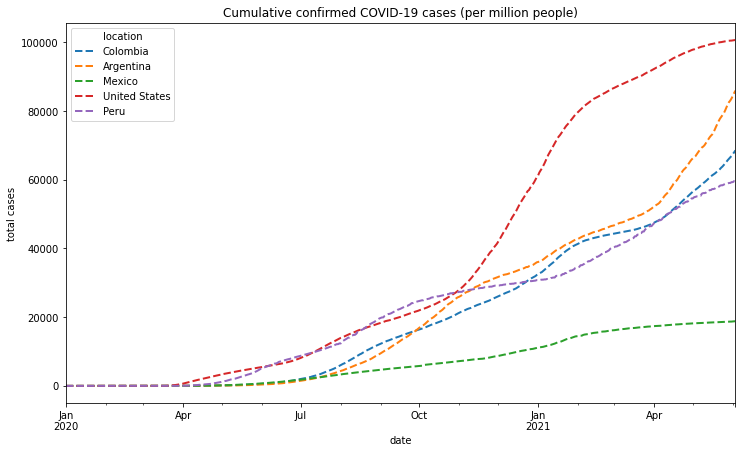

In [16]:
countries = ['Colombia', 'Argentina', 'Mexico', 'United States', 'Peru']

cases_by_time[countries].plot(figsize = (12,7),
                              title = 'Cumulative confirmed COVID-19 cases (per million people)',
                              linewidth=2, 
                              linestyle='dashed',)

plt.xlabel('date')
plt.ylabel('total cases')
plt.show()

####Percent of population infected by country

To calculate the percent of population infected with coronavirus by country, it is necessary to compare the total cases with the population. The following steps are required to represent the data in a Power BI map:

1. Identify the unique values in the location attribute.
2. Working with null values.
3. Create a new column to calculate the total cases/population for each one of the countries.
4. Export the data to build the dashboard in Power BI.


In [17]:
covid_infection = covid_data_copy.copy(deep=True)
covid_infection.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [18]:
covid_infection.loc[covid_infection['location'] =='Africa'].head()

,continent,location,date,population,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand
466,NaN,Africa,2020-02-13,1340598113.0,nan,0.0,nan,0.0,nan,0.0,nan,0.0,nan,nan,nan,nan,nan,nan,nan
467,NaN,Africa,2020-02-14,1340598113.0,1.0,1.0,nan,0.0,0.0,0.0,nan,0.0,nan,nan,nan,nan,nan,nan,nan
468,NaN,Africa,2020-02-15,1340598113.0,1.0,0.0,nan,0.0,0.0,0.0,nan,0.0,nan,nan,nan,nan,nan,nan,nan
469,NaN,Africa,2020-02-16,1340598113.0,1.0,0.0,nan,0.0,0.0,0.0,nan,0.0,nan,nan,nan,nan,nan,nan,nan
470,NaN,Africa,2020-02-17,1340598113.0,1.0,0.0,nan,0.0,0.0,0.0,nan,0.0,nan,nan,nan,nan,nan,nan,nan


It is observed that, for the rows where location is a continent, the attribute 'continent' has a NaN value. Additionaly, as it is necessary to divide the total cases by the population, the latter must not have null values or zeros, to avoid the float division by zero error.

In [19]:
covid_infection = covid_infection[covid_infection['continent'].notnull()]
countries_without_population = covid_infection[covid_infection['population'].isnull()]
countries_without_population.location.unique()

array(['Northern Cyprus'], dtype=object)

In [20]:
covid_infection.loc[covid_infection['location'] == 'Northern Cyprus'].tail()

,continent,location,date,population,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand
62685,Asia,Northern Cyprus,2021-05-23,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
62686,Asia,Northern Cyprus,2021-05-24,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
62687,Asia,Northern Cyprus,2021-05-25,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
62688,Asia,Northern Cyprus,2021-05-26,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
62689,Asia,Northern Cyprus,2021-05-27,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In general, the country 'Northern Cyprus' don't have relevant information for the analysis. Consequently, it can be removed.

In [21]:
country_to_eliminate = covid_infection[(covid_infection['location'] == 'Northern Cyprus')].index
covid_infection_modified = covid_infection.drop(index = country_to_eliminate, axis=0)

In [22]:
values = {'total_cases': 0}
covid_infection_modified.fillna(value=values, inplace= True)

In [23]:
covid_infection_modified['percent_population_infected'] = covid_infection_modified.apply(lambda x: x['total_cases']/x['population']*100, axis=1)
covid_infection_data = covid_infection_modified.groupby(['location'])[['percent_population_infected']].max().sort_values(by='percent_population_infected', ascending=False)
covid_infection_data.head(5)

,percent_population_infected
location,
Andorra,17.8
Montenegro,15.9
Czechia,15.5
San Marino,15.0
Bahrain,14.5


In [24]:
covid_infection_data.to_excel('covid_infection_data.xlsx',index=True)

###Covid Deaths

In [25]:
covid_deaths = covid_data_copy.copy(deep=True)
global_deaths = covid_deaths[covid_deaths['continent'].isnull()]
global_deaths = global_deaths[['location', 'total_cases', 'new_cases','total_deaths','new_deaths','total_cases_per_million','new_cases_per_million','total_deaths_per_million','new_deaths_per_million']]

covid_cases[['location','date','total_cases_per_million']]
global_deaths.head()

,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million
466,Africa,nan,0.0,nan,0.0,nan,0.0,nan,0.0
467,Africa,1.0,1.0,nan,0.0,0.0,0.0,nan,0.0
468,Africa,1.0,0.0,nan,0.0,0.0,0.0,nan,0.0
469,Africa,1.0,0.0,nan,0.0,0.0,0.0,nan,0.0
470,Africa,1.0,0.0,nan,0.0,0.0,0.0,nan,0.0


In [26]:
global_deaths['location'].unique()

array(['Africa', 'Asia', 'Europe', 'European Union', 'International',
       'North America', 'Oceania', 'South America', 'World'], dtype=object)

As European Union is part of the Europe and 'World' contains information for all countries, a filter will be created to drop this information from the dataset.

In [27]:
no_continents = global_deaths.query("(location == 'World') | (location == 'European Union') | (location == 'International')").index
global_deaths.drop(index=no_continents, axis=0, inplace= True)
global_deaths['location'].unique()

array(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'], dtype=object)

In [28]:
global_deaths.fillna(0)

,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million
466,Africa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
467,Africa,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
468,Africa,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
469,Africa,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
470,Africa,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
78035,South America,28680035.0,102939.0,777433.0,2128.0,66580.1,239.0,1804.8,4.9
78036,South America,28786883.0,106848.0,780195.0,2762.0,66828.2,248.0,1811.2,6.4
78037,South America,28945334.0,158451.0,784174.0,3979.0,67196.0,367.8,1820.4,9.2
78038,South America,29131361.0,186027.0,903750.0,119576.0,67627.9,431.9,2098.0,277.6


In [29]:
deaths_by_continent = global_deaths.groupby(['location'])[['new_cases_per_million','new_deaths_per_million']].sum().sort_values(by='new_deaths_per_million', ascending=False)
deaths_by_continent.rename(columns={'new_deaths_per_million':'total_deaths_per_million',
                                  'new_cases_per_million': 'total_cases_per_million'}, inplace=True)
deaths_by_continent

,total_cases_per_million,total_deaths_per_million
location,,
South America,68007.6,2105.7
North America,65877.7,1495.1
Europe,62837.0,1440.3
Asia,11184.8,150.5
Africa,3631.0,98.0
Oceania,1161.7,25.8


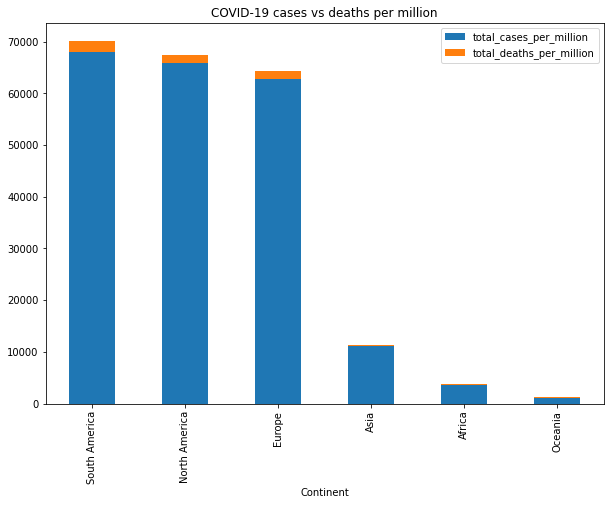

In [30]:
deaths_by_continent.plot(figsize = (10,7), 
                          kind='bar', 
                          stacked = True,
                          title = 'COVID-19 cases vs deaths per million',
                          )
plt.xlabel('Continent')
plt.show()

In [31]:
deaths_by_continent['case_fatality_rate'] = deaths_by_continent.apply(lambda x: x['total_deaths_per_million']/x['total_cases_per_million']*100, axis=1)
case_fatality_rate_by_continent = deaths_by_continent[['case_fatality_rate']]
case_fatality_rate_by_continent

,case_fatality_rate
location,
South America,3.1
North America,2.3
Europe,2.3
Asia,1.3
Africa,2.7
Oceania,2.2


In [33]:
deaths_by_continent.to_excel('deaths_by_continent.xlsx',index=True)

####Case Fatality Rate Variables

The Case Fatality Rate is a measure of the risk of dying if someone is infected with COVID-19. There are many variables that can affect it, such as age and preexisting health conditions. For this case, the following variables will be analyzed:

-Median_age                              
-Cardiovasc_death_rate        
-Diabetes_prevalence          
-Handwashing_facilities      
-Hospital_beds_per_thousand

In [35]:
covid_infection.shape

(88909, 19)

In [36]:
covid_infection.isnull().sum()

continent                         0
location                          0
date                              0
population                      134
total_cases                    2968
new_cases                      2974
total_deaths                  12740
new_deaths                    12741
total_cases_per_million        2968
new_cases_per_million          2974
total_deaths_per_million      12740
new_deaths_per_million        12741
median_age                     5722
aged_65_older                  6666
aged_70_older                  6186
cardiovasc_death_rate          5323
diabetes_prevalence            3333
handwashing_facilities        47170
hospital_beds_per_thousand    12759
dtype: int64

In [37]:
handwashing_facilities = covid_infection[covid_infection['handwashing_facilities'].isnull()]
handwashing_facilities['location'].unique()

array(['Albania', 'Andorra', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Aruba', 'Australia', 'Austria', 'Bahamas', 'Bahrain',
       'Belarus', 'Belgium', 'Bermuda', 'Bonaire Sint Eustatius and Saba',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Canada', 'Cape Verde', 'Cayman Islands', 'Chile',
       'China', 'Cook Islands', 'Croatia', 'Curacao', 'Cyprus', 'Czechia',
       'Denmark', 'Djibouti', 'Dominica', 'Eritrea', 'Estonia',
       'Faeroe Islands', 'Falkland Islands', 'Fiji', 'Finland', 'France',
       'French Polynesia', 'Gabon', 'Georgia', 'Germany', 'Gibraltar',
       'Greece', 'Greenland', 'Grenada', 'Guernsey', 'Hong Kong',
       'Hungary', 'Iceland', 'Iran', 'Ireland', 'Isle of Man', 'Israel',
       'Italy', 'Japan', 'Jersey', 'Jordan', 'Kiribati', 'Kosovo',
       'Kuwait', 'Latvia', 'Lebanon', 'Libya', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Macao', 'Malaysia', 'Malta',
       'Mauritius', 'Micronesia (

It is observed that more than 50% of the attribute "handwashing facilities", contains null data, which does not allow to obtain correct conclusions about its incidence in the Case Fatality Rate. As there is no more information about it, this variable will not be taken into account for the analysis. To replace the other null values, the distribution of the data will be analyzed.

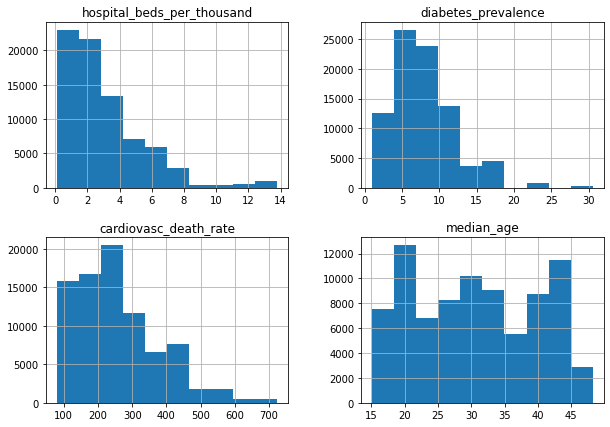

In [38]:
covid_infection[['hospital_beds_per_thousand','diabetes_prevalence','cardiovasc_death_rate','median_age']].hist(figsize = (10,7))
plt.show()

Initially, data distribution is skewed to the right for most of the attributes. Therefore, using the median to replace null values is the best option because of the median is less affected by the presence of biases in the distribution or extreme values. Respect to median age, a more symmetrical distribution is observed and the mean could be used. Although, continents have particular demographic characteristics and it is necessary to make an analysis of the data distribution for each of these.

In [39]:
asia = covid_infection[covid_infection['continent'] == 'Asia']
africa = covid_infection[covid_infection['continent'] == 'Africa']
europe = covid_infection[covid_infection['continent'] == 'Europe']
north_america = covid_infection[covid_infection['continent'] == 'North America']
south_america = covid_infection[covid_infection['continent'] == 'South America']
oceania = covid_infection[covid_infection['continent'] == 'Oceania']

continents = [asia, africa, europe, north_america, south_america, oceania]

In [41]:
def dataExploration(atribute_name):
  """
  return a Matplotlib Histogram by each continent in continents list.
   
  Parameters:
  atribute_name: The column name to be represented by a histogram."""

  for continent in continents:
    continent[atribute_name].hist(figsize = (5,3))
    plt.xlabel(f'{continent.continent.unique()}')
    plt.show()

#####Distribution data by median age

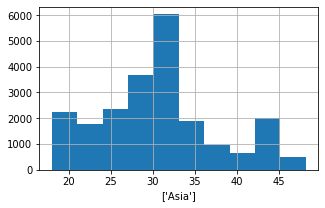

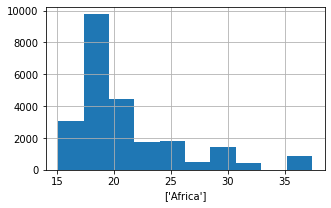

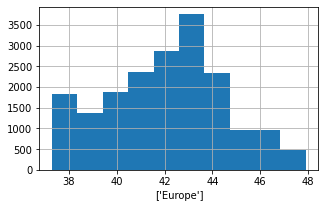

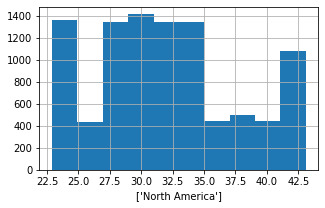

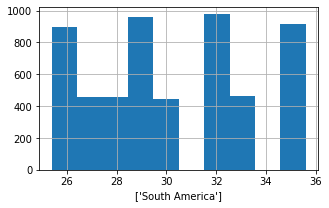

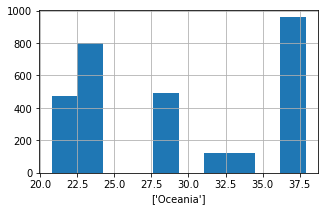

In [42]:
dataExploration('median_age')

#####Distribution data by cardiovascular death rate

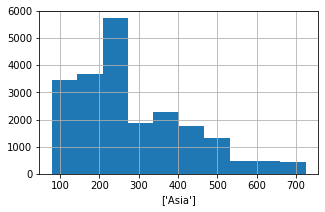

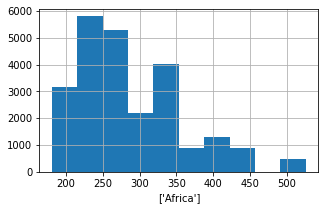

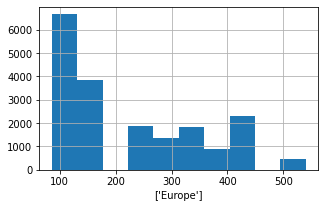

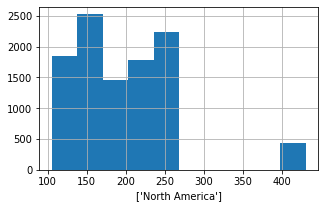

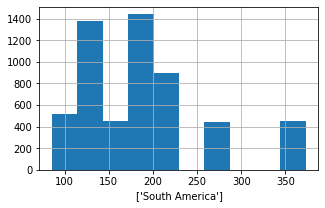

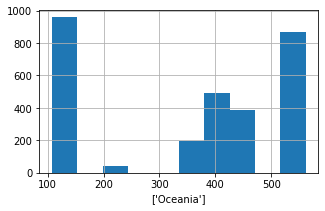

In [43]:
dataExploration('cardiovasc_death_rate')

#####Distribution data by diabetes prevalence

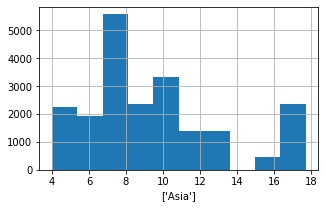

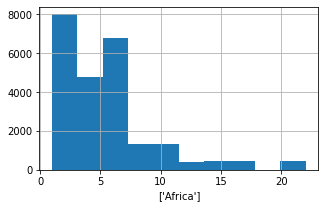

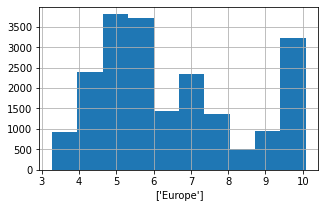

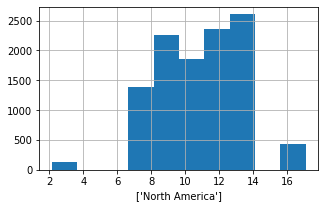

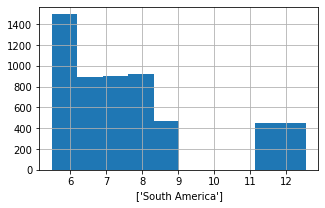

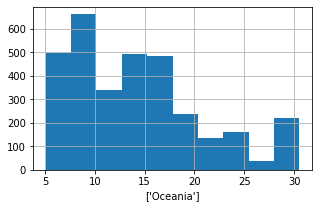

In [44]:
dataExploration('diabetes_prevalence')

#####Distribution data by hospital beds

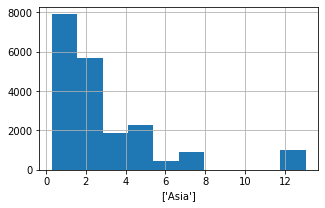

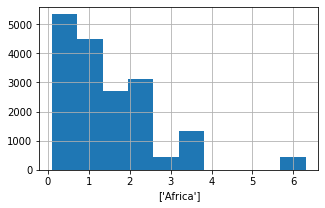

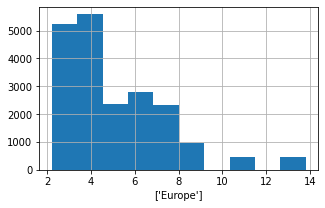

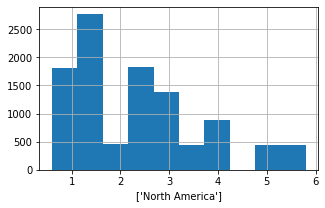

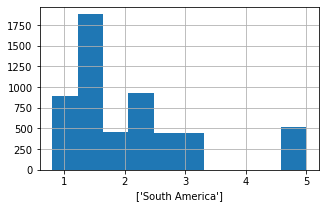

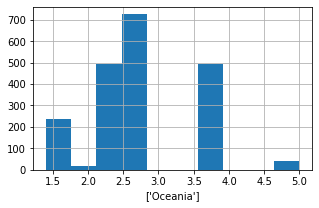

In [45]:
dataExploration('hospital_beds_per_thousand')

#####Case Fatality Rate Analysis

After analyzing the distribution of the data, we can observe the following:

-The oldest median age population is found in Europe, where the data is concentrated between the ages of 37 and 48 approximately. On the other hand, the median age population in Africa is concentrated between the ages of 15 and 25 approximately.

-Data distribution of death rate from cardiovascular disease (annual number of deaths per 100,000 people) is skewed to the right, except Oceanía, where the most of the data are in 100 deaths per 100,000 people and 500 deaths per 100,000 people, approximately.

-Data distribution according to Diabetes prevalence attribute (% of population aged 20 to 79) is concentrated between 6% and 14% for North America, 4% and 10% for Europe, 1% and 8% for Africa approximately. In contrast, for South America the data is concentrated between 5% and 9%, and 11% to 12% for some countries. Additionally, some countries of Oceania have the highest diabetes prevalence, with 30% of population.

-In relation to hospital beds per 1,000 people, data distribution is skewed to the right. Europe and Oceania are the continents with the highest number of hospital beds and, for our analysis, this may be one of the variables with the greatest influence on the Case Fatality Rate (CFR).

-Finally, according with the previous analysis, the median is the best way to replace the null values, due to is lower affect by the atypical values.

In [ ]:
for continent in continents:
  continent.fillna(continent.median(), inplace=True)

In [48]:
covid_mod = pd.concat([asia, africa, europe, north_america, south_america, oceania])
covid_mod

,continent,location,date,population,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand
0,Asia,Afghanistan,2020-02-24,38928341.0,1.0,1.0,582.0,3.0,0.0,0.0,27.1,0.1,18.6,2.6,1.3,597.0,9.6,37.7,0.5
1,Asia,Afghanistan,2020-02-25,38928341.0,1.0,0.0,582.0,3.0,0.0,0.0,27.1,0.1,18.6,2.6,1.3,597.0,9.6,37.7,0.5
2,Asia,Afghanistan,2020-02-26,38928341.0,1.0,0.0,582.0,3.0,0.0,0.0,27.1,0.1,18.6,2.6,1.3,597.0,9.6,37.7,0.5
3,Asia,Afghanistan,2020-02-27,38928341.0,1.0,0.0,582.0,3.0,0.0,0.0,27.1,0.1,18.6,2.6,1.3,597.0,9.6,37.7,0.5
4,Asia,Afghanistan,2020-02-28,38928341.0,1.0,0.0,582.0,3.0,0.0,0.0,27.1,0.1,18.6,2.6,1.3,597.0,9.6,37.7,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91518,Oceania,Wallis and Futuna,2021-05-28,11246.0,34.0,0.0,24.0,0.0,62.5,0.0,4.5,0.0,28.6,6.2,3.3,412.8,14.5,35.9,2.6
91519,Oceania,Wallis and Futuna,2021-05-29,11246.0,34.0,0.0,24.0,0.0,62.5,0.0,4.5,0.0,28.6,6.2,3.3,412.8,14.5,35.9,2.6
91520,Oceania,Wallis and Futuna,2021-05-30,11246.0,34.0,0.0,24.0,0.0,62.5,0.0,4.5,0.0,28.6,6.2,3.3,412.8,14.5,35.9,2.6
91521,Oceania,Wallis and Futuna,2021-05-31,11246.0,34.0,0.0,24.0,0.0,62.5,0.0,4.5,0.0,28.6,6.2,3.3,412.8,14.5,35.9,2.6


In [53]:
cfr_variables = covid_mod.groupby(['continent'])[['median_age','hospital_beds_per_thousand','cardiovasc_death_rate','diabetes_prevalence']].median().sort_values(by='hospital_beds_per_thousand', ascending=False)
cfr_variables

,median_age,hospital_beds_per_thousand,cardiovasc_death_rate,diabetes_prevalence
continent,,,,
Europe,42.4,4.5,168.7,5.8
Oceania,28.6,2.6,412.8,14.5
North America,31.4,2.3,191.0,11.0
Asia,30.6,2.0,265.9,8.3
South America,29.6,1.7,178.0,6.9
Africa,19.4,1.3,276.0,4.8


In [54]:
cfr_variables.to_excel('cfr_variables.xlsx',index=True)